# Nightlife in New York

## I. Introduction 

This project aims to provide valuable insights into the top nightlife spots in New York City by analyzing customer reviews from Yelp. The primary clients for this analysis are **nightlife business owners, investors, and marketers** interested in understanding consumer preferences, experiences, and trends in the NYC nightlife industry. 

Through web scraping techniques, data was collected on the top 10 rated nightlife venues in NYC according to Yelp, including over 500 customer reviews across these establishments. The dataset contains key information such as review text, user ratings, dates, locations, and whether reviews were marked as helpful by other Yelp users.

By analyzing this rich dataset, this project seeks to answer several important business questions:

1. What are the highest and lowest rated nightlife venues based on customer reviews?
2. What is the overall average customer rating across all the top venues?
3. How many reviews tend to be marked as helpful on average?
4. What is the distribution of ratings?
5. Which customers are the most prolific reviewers of NYC nightlife?
6. What locations/neighborhoods are most mentioned in association with each venue?

In addition to descriptive analysis, advanced natural language processing techniques like sentiment analysis and topic modeling will be applied to the review text data to derive deeper qualitative insights.

The findings from this analysis can be highly valuable for **nightlife business owners** to understand their strengths, weaknesses, and how they are perceived relative to competitors. **Investors** can use this data to identify emerging hot spots and potential areas for growth. **Marketers** can better tailor campaigns and promotions based on customer sentiment analysis. Overall, such data-driven insights can inform strategic decision-making across the NYC nightlife industry.

## II. Data - Use Section 1 Material

In [6]:
# Set up the environment
import time 
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.common.exceptions import NoSuchElementException

In [52]:
#Get Chrome driver
driver = webdriver.Chrome()

### Part 1: Get top 10 Best Nightlife in New York

In [31]:
# Get top 10 Best Nightlife in New York

# dictionary to store data
nightlife_dic = {'Place': [], 'Place_url':[], 'Review_url':[]} 

# link to top 10 places
link = "https://www.yelp.com/search?find_desc=Nightlife&find_loc=New+York%2C+NY&sortby=review_count"
# get the link
driver.get(link)
# sleep 10 seconds
time.sleep(10)

# Find all elements that match the XPath
places = driver.find_elements("xpath", '(//div[@class="businessName__09f24__HG_pC yelp-emotion-ohs7lg"])[position() >= 3 and position() < last()]')
place_urls = driver.find_elements("xpath", '(//div[@class="businessName__09f24__HG_pC yelp-emotion-ohs7lg"]/div/h3/a)[position() >= 3 and position() < last()]')
review_urls = driver.find_elements("xpath", '//*[@id="main-content"]/div/ul/li/div[1]/div/div[2]/div[2]/div/div/div/div[2]/p/span[2]/a')

# Iterate over each element to get its text content
for place, place_url, review_url in zip(places, place_urls, review_urls):
    nightlife_dic["Place"].append(place.get_attribute('textContent').strip())
    nightlife_dic['Place_url'].append(place_url.get_attribute('href'))
    nightlife_dic['Review_url'].append(review_url.get_attribute('href'))

In [32]:
# save data to pandas
import pandas as pd  

nightlife_df = pd.DataFrame(nightlife_dic)
nightlife_df

Place  \
0  1. 230 Fifth Rooftop Bar   
1      2. Please Don’t Tell   
2        3. The Dead Rabbit   
3        4. Raines Law Room   
4               5. Apotheke   
5       6. Refinery Rooftop   
6               7. Slate NY   
7             8. Mr. Purple   
8                9. Attaboy   
9           10. Dear Irving   

                                           Place_url  \
0  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1  https://www.yelp.com/biz/please-dont-tell-new-...   
2  https://www.yelp.com/biz/the-dead-rabbit-new-y...   
3  https://www.yelp.com/biz/raines-law-room-new-y...   
4  https://www.yelp.com/biz/apotheke-new-york-4?o...   
5  https://www.yelp.com/biz/refinery-rooftop-new-...   
6  https://www.yelp.com/biz/slate-ny-new-york?osq...   
7  https://www.yelp.com/biz/mr-purple-new-york?os...   
8  https://www.yelp.com/biz/attaboy-new-york?osq=...   
9  https://www.yelp.com/biz/dear-irving-new-york?...   

                                          Review_url  
0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
1  https://www.yelp.com/biz/please-dont-tell-new-...  
2  https://www.yelp.com/biz/the-dead-rabbit-new-y...  
3  https://www.yelp.com/biz/raines-law-room-new-y...  
4  https://www.yelp.com/biz/apotheke-new-york-4?h...  
5  https://www.yelp.com/biz/refinery-rooftop-new-...  
6  https://www.yelp.com/biz/slate-ny-new-york?hri...  
7  https://www.yelp.com/biz/mr-purple-new-york?hr...  
8  https://www.yelp.com/biz/attaboy-new-york?hrid...  
9  https://www.yelp.com/biz/dear-irving-new-york?...

In [33]:
nightlife_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Place       10 non-null     object
 1   Place_url   10 non-null     object
 2   Review_url  10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [34]:
# Remove ordered list from the place name
nightlife_df['Place'] = nightlife_df['Place'].str.replace('^\d+\.\s', '', regex=True)
nightlife_df

Place                                          Place_url  \
0  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1      Please Don’t Tell  https://www.yelp.com/biz/please-dont-tell-new-...   
2        The Dead Rabbit  https://www.yelp.com/biz/the-dead-rabbit-new-y...   
3        Raines Law Room  https://www.yelp.com/biz/raines-law-room-new-y...   
4               Apotheke  https://www.yelp.com/biz/apotheke-new-york-4?o...   
5       Refinery Rooftop  https://www.yelp.com/biz/refinery-rooftop-new-...   
6               Slate NY  https://www.yelp.com/biz/slate-ny-new-york?osq...   
7             Mr. Purple  https://www.yelp.com/biz/mr-purple-new-york?os...   
8                Attaboy  https://www.yelp.com/biz/attaboy-new-york?osq=...   
9            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   

                                          Review_url  
0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
1  https://www.yelp.com/biz/please-dont-tell-new-...  
2  https://www.yelp.com/biz/the-dead-rabbit-new-y...  
3  https://www.yelp.com/biz/raines-law-room-new-y...  
4  https://www.yelp.com/biz/apotheke-new-york-4?h...  
5  https://www.yelp.com/biz/refinery-rooftop-new-...  
6  https://www.yelp.com/biz/slate-ny-new-york?hri...  
7  https://www.yelp.com/biz/mr-purple-new-york?hr...  
8  https://www.yelp.com/biz/attaboy-new-york?hrid...  
9  https://www.yelp.com/biz/dear-irving-new-york?...

### Part 2: Collect reviews for each place

In [35]:
# display full values for columns
pd.set_option('display.max_colwidth', None)

# check the urls in review_url
nightlife_df["Review_url"][:5]

0    https://www.yelp.com/biz/230-fifth-rooftop-bar-new-york?hrid=cVoM31mDsoIH7mggYjJSjg&osq=Nightlife
1       https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife
2          https://www.yelp.com/biz/the-dead-rabbit-new-york?hrid=4Wi3xZt46UsGxWkT2QRVEg&osq=Nightlife
3          https://www.yelp.com/biz/raines-law-room-new-york?hrid=fUawPKZH2pIY4PZrD6dTCg&osq=Nightlife
4               https://www.yelp.com/biz/apotheke-new-york-4?hrid=i9HIvcS6v_CB8e_b_oxZGg&osq=Nightlife
Name: Review_url, dtype: object

In [44]:
pd.reset_option('display.max_colwidth')

In [37]:
# Testing pagination
for i in range(0,100, 10):
    link = nightlife_df["Review_url"][1]+ "&start=" + str(i)
    print(link)

https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=0
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=10
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=20
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=30
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=40
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=50
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=60
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=70
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWmmrQutyosp1ZKbDw&osq=Nightlife&start=80
https://www.yelp.com/biz/please-dont-tell-new-york-2?hrid=k6L5FWm

In [64]:
# Start another dictionary to save the data from each page
detail = {'Customer':[],'Ratings': [], 'Date': [],'Review_text': [], 'Location': [], 'Helpful': [], 'Review_url': []}

for i in nightlife_df["Review_url"]:
    for j in range(0,100,10):
        link = i + "&start=" + str(j)
        
        # Go to review link for each page 
        driver.get(link)
        
        # sleep 10 seconds
        time.sleep(10)

        # Find all elements that match the XPath
        customers = driver.find_elements("xpath", '//*[@id="reviews"]/section/div[2]/ul/li/div/div[1]/div/div[1]/div/div/div[2]/div[1]/span/a')
        ratings = driver.find_elements("xpath", '//*[@id="reviews"]/section/div[2]/ul/li/div/div[2]/div/div[1]/span/div')
        dates = driver.find_elements("xpath", '//*[@id="reviews"]/section/div[2]/ul/li/div/div[2]/div/div[2]')
        review_texts = driver.find_elements("xpath", '//p[@class="comment__09f24__D0cxf yelp-emotion-19a3fsb"]')
        locations = driver.find_elements("xpath", '//*[@id="reviews"]/section/div[2]/ul/li/div/div[1]/div/div[1]/div/div/div[2]/div[1]/div[2]/div')
        helpfuls = driver.find_elements("xpath", '//*[@id="reviews"]/section/div[2]/ul/li/div/div[6]/div/div/div[1]/div/div/div[2]/div/div[1]/span[2]')

        # Iterate over each element to get its text content
        for customer, rating, date, review_text, location, helpful in zip(customers, ratings, dates, review_texts, locations, helpfuls):
            detail["Customer"].append(customer.get_attribute('textContent').strip())
            detail["Ratings"].append(rating.get_attribute('aria-label'))
            detail["Date"].append(date.get_attribute('textContent').strip())
            detail["Review_text"].append(review_text.get_attribute('textContent').strip())
            detail["Location"].append(location.get_attribute('textContent').strip())
            detail["Helpful"].append(helpful.get_attribute('textContent').strip())
            detail['Review_url'].append(i)

# Convert the dictionary to a pandas DataFrame
detail_df = pd.DataFrame(detail)
detail_df

Customer        Ratings          Date  \
0    Jackie S.  4 star rating  Jul 27, 2014   
1      Seth S.  4 star rating  Jan 26, 2024   
2    Jordan U.  3 star rating  Apr 16, 2024   
3     Filip W.  2 star rating  Feb 17, 2024   
4    Brenda D.  5 star rating  Apr 14, 2024   
..         ...            ...           ...   
508    Emma T.  4 star rating  Apr 12, 2017   
509     Sam C.  4 star rating  Apr 21, 2023   
510    Emma T.  4 star rating  Apr 12, 2017   
511     Ray E.  5 star rating   Dec 7, 2021   
512   Karen S.  5 star rating  Jun 16, 2018   

                                           Review_text             Location  \
0    The first time I came here was in the fall, so...        Oceanside, NY   
1    After seeing many TikToks about 230 Fifth befo...      Chula Vista, CA   
2    Come for the views, leave for the drinks.On a ...          Fairfax, VA   
3    I bought the prefix menu. Ans it was the most ...        San Diego, CA   
4    We noticed a cool spot with lights from The Em...      Albuquerque, NM   
..                                                 ...                  ...   
508  I have been wanting to go here for a while and...          Seattle, WA   
509  I had been wanting to try Dear Irving for a wh...  Deerfield Beach, FL   
510  I have been wanting to go here for a while and...            Tampa, FL   
511  Very posh atmosphere and great cocktails.I hav...        Manhattan, NY   
512  Lion - earthy herbaceous whiskey tartWhiskey b...          Chicago, IL   

    Helpful                                         Review_url  
0         5  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
1         1  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
2         0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
3         2  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
4         0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
..      ...                                                ...  
508       1  https://www.yelp.com/biz/dear-irving-new-york?...  
509      57  https://www.yelp.com/biz/dear-irving-new-york?...  
510       1  https://www.yelp.com/biz/dear-irving-new-york?...  
511       5  https://www.yelp.com/biz/dear-irving-new-york?...  
512       0  https://www.yelp.com/biz/dear-irving-new-york?...  

[513 rows x 7 columns]

### Data Cleaning

In [65]:
detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer     513 non-null    object
 1   Ratings      513 non-null    object
 2   Date         513 non-null    object
 3   Review_text  513 non-null    object
 4   Location     513 non-null    object
 5   Helpful      513 non-null    object
 6   Review_url   513 non-null    object
dtypes: object(7)
memory usage: 28.2+ KB


In [66]:
# Remove " start rating" from Ratings column
detail_df['Ratings'] = detail_df['Ratings'].str.replace(' star rating', '')
detail_df

Customer Ratings          Date  \
0    Jackie S.       4  Jul 27, 2014   
1      Seth S.       4  Jan 26, 2024   
2    Jordan U.       3  Apr 16, 2024   
3     Filip W.       2  Feb 17, 2024   
4    Brenda D.       5  Apr 14, 2024   
..         ...     ...           ...   
508    Emma T.       4  Apr 12, 2017   
509     Sam C.       4  Apr 21, 2023   
510    Emma T.       4  Apr 12, 2017   
511     Ray E.       5   Dec 7, 2021   
512   Karen S.       5  Jun 16, 2018   

                                           Review_text             Location  \
0    The first time I came here was in the fall, so...        Oceanside, NY   
1    After seeing many TikToks about 230 Fifth befo...      Chula Vista, CA   
2    Come for the views, leave for the drinks.On a ...          Fairfax, VA   
3    I bought the prefix menu. Ans it was the most ...        San Diego, CA   
4    We noticed a cool spot with lights from The Em...      Albuquerque, NM   
..                                                 ...                  ...   
508  I have been wanting to go here for a while and...          Seattle, WA   
509  I had been wanting to try Dear Irving for a wh...  Deerfield Beach, FL   
510  I have been wanting to go here for a while and...            Tampa, FL   
511  Very posh atmosphere and great cocktails.I hav...        Manhattan, NY   
512  Lion - earthy herbaceous whiskey tartWhiskey b...          Chicago, IL   

    Helpful                                         Review_url  
0         5  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
1         1  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
2         0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
3         2  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
4         0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  
..      ...                                                ...  
508       1  https://www.yelp.com/biz/dear-irving-new-york?...  
509      57  https://www.yelp.com/biz/dear-irving-new-york?...  
510       1  https://www.yelp.com/biz/dear-irving-new-york?...  
511       5  https://www.yelp.com/biz/dear-irving-new-york?...  
512       0  https://www.yelp.com/biz/dear-irving-new-york?...  

[513 rows x 7 columns]

In [67]:
# Merging the DataFrames on the 'Review_url' column
merged_df = pd.merge(nightlife_df, detail_df, on='Review_url', how='inner')
merged_df

Place                                          Place_url  \
0    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
2    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
3    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
4    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
..                     ...                                                ...   
508            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
509            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
510            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
511            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
512            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   

                                            Review_url   Customer Ratings  \
0    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jackie S.       4   
1    https://www.yelp.com/biz/230-fifth-rooftop-bar...    Seth S.       4   
2    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jordan U.       3   
3    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Filip W.       2   
4    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Brenda D.       5   
..                                                 ...        ...     ...   
508  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.       4   
509  https://www.yelp.com/biz/dear-irving-new-york?...     Sam C.       4   
510  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.       4   
511  https://www.yelp.com/biz/dear-irving-new-york?...     Ray E.       5   
512  https://www.yelp.com/biz/dear-irving-new-york?...   Karen S.       5   

             Date                                        Review_text  \
0    Jul 27, 2014  The first time I came here was in the fall, so...   
1    Jan 26, 2024  After seeing many TikToks about 230 Fifth befo...   
2    Apr 16, 2024  Come for the views, leave for the drinks.On a ...   
3    Feb 17, 2024  I bought the prefix menu. Ans it was the most ...   
4    Apr 14, 2024  We noticed a cool spot with lights from The Em...   
..            ...                                                ...   
508  Apr 12, 2017  I have been wanting to go here for a while and...   
509  Apr 21, 2023  I had been wanting to try Dear Irving for a wh...   
510  Apr 12, 2017  I have been wanting to go here for a while and...   
511   Dec 7, 2021  Very posh atmosphere and great cocktails.I hav...   
512  Jun 16, 2018  Lion - earthy herbaceous whiskey tartWhiskey b...   

                Location Helpful  
0          Oceanside, NY       5  
1        Chula Vista, CA       1  
2            Fairfax, VA       0  
3          San Diego, CA       2  
4        Albuquerque, NM       0  
..                   ...     ...  
508          Seattle, WA       1  
509  Deerfield Beach, FL      57  
510            Tampa, FL       1  
511        Manhattan, NY       5  
512          Chicago, IL       0  

[513 rows x 9 columns]

In [68]:
# save the all the data into one file
merged_df.to_excel("Top_10_nightlife_New_York.xlsx")

## III. Methodology - Use Section 2 Material

### Text Cleaning

In [1]:
# Import data

import pandas as pd
Nightlife_NY = pd.read_excel("Top_10_nightlife_New_York.xlsx")
# drop column 'Unnamed: 0'
Nightlife_NY = Nightlife_NY.drop("Unnamed: 0", axis = 1)

Nightlife_NY

Place                                          Place_url  \
0    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
2    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
3    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
4    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
..                     ...                                                ...   
508            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
509            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
510            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
511            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
512            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   

                                            Review_url   Customer  Ratings  \
0    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jackie S.        4   
1    https://www.yelp.com/biz/230-fifth-rooftop-bar...    Seth S.        4   
2    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jordan U.        3   
3    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Filip W.        2   
4    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Brenda D.        5   
..                                                 ...        ...      ...   
508  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
509  https://www.yelp.com/biz/dear-irving-new-york?...     Sam C.        4   
510  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
511  https://www.yelp.com/biz/dear-irving-new-york?...     Ray E.        5   
512  https://www.yelp.com/biz/dear-irving-new-york?...   Karen S.        5   

             Date                                        Review_text  \
0    Jul 27, 2014  The first time I came here was in the fall, so...   
1    Jan 26, 2024  After seeing many TikToks about 230 Fifth befo...   
2    Apr 16, 2024  Come for the views, leave for the drinks.On a ...   
3    Feb 17, 2024  I bought the prefix menu. Ans it was the most ...   
4    Apr 14, 2024  We noticed a cool spot with lights from The Em...   
..            ...                                                ...   
508  Apr 12, 2017  I have been wanting to go here for a while and...   
509  Apr 21, 2023  I had been wanting to try Dear Irving for a wh...   
510  Apr 12, 2017  I have been wanting to go here for a while and...   
511   Dec 7, 2021  Very posh atmosphere and great cocktails.I hav...   
512  Jun 16, 2018  Lion - earthy herbaceous whiskey tartWhiskey b...   

                Location  Helpful  
0          Oceanside, NY        5  
1        Chula Vista, CA        1  
2            Fairfax, VA        0  
3          San Diego, CA        2  
4        Albuquerque, NM        0  
..                   ...      ...  
508          Seattle, WA        1  
509  Deerfield Beach, FL       57  
510            Tampa, FL        1  
511        Manhattan, NY        5  
512          Chicago, IL        0  

[513 rows x 9 columns]

In [2]:
Nightlife_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Place        513 non-null    object
 1   Place_url    513 non-null    object
 2   Review_url   513 non-null    object
 3   Customer     513 non-null    object
 4   Ratings      513 non-null    int64 
 5   Date         513 non-null    object
 6   Review_text  513 non-null    object
 7   Location     513 non-null    object
 8   Helpful      513 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 36.2+ KB


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
import re

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
    
def clean_pipeline(text):
    
    # Step 1: Lower all the cases in 'text'
    text = text.lower()
    
    # Step 2: Tokenizing sentences into words
    token_list = word_tokenize(text)
    
    # Step 3: Removing stopwords and meaningless words
    stop_words = set(stopwords.words('english'))
    
    # Save the non-stopwords in a list
    filtered_tokens = [word for word in token_list if word not in stop_words]
    
    # Step 4: Lemmatizing the list without stopwords
    lemma_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # step 5: filtering nouns, and adjectives
    word_tag = pos_tag(lemma_words)
    
    nouns_adj = [word for word, tag in word_tag if tag in ["NN", "NNP", "NNS", "JJ", "JJR", "JJS"]]
    
    # Step 6: Removing special characters, keeping words and numbers
    # Join tokens into a string before using re.sub
    nouns_adj = ' '.join(nouns_adj)
    clean_text = re.sub("[^a-zA-Z0-9]", " ", nouns_adj)

    return clean_text

In [4]:
Nightlife_NY['Cleaned_text'] = Nightlife_NY['Review_text'].apply(clean_pipeline)
Nightlife_NY

Place                                          Place_url  \
0    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
2    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
3    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
4    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
..                     ...                                                ...   
508            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
509            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
510            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
511            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
512            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   

                                            Review_url   Customer  Ratings  \
0    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jackie S.        4   
1    https://www.yelp.com/biz/230-fifth-rooftop-bar...    Seth S.        4   
2    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jordan U.        3   
3    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Filip W.        2   
4    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Brenda D.        5   
..                                                 ...        ...      ...   
508  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
509  https://www.yelp.com/biz/dear-irving-new-york?...     Sam C.        4   
510  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
511  https://www.yelp.com/biz/dear-irving-new-york?...     Ray E.        5   
512  https://www.yelp.com/biz/dear-irving-new-york?...   Karen S.        5   

             Date                                        Review_text  \
0    Jul 27, 2014  The first time I came here was in the fall, so...   
1    Jan 26, 2024  After seeing many TikToks about 230 Fifth befo...   
2    Apr 16, 2024  Come for the views, leave for the drinks.On a ...   
3    Feb 17, 2024  I bought the prefix menu. Ans it was the most ...   
4    Apr 14, 2024  We noticed a cool spot with lights from The Em...   
..            ...                                                ...   
508  Apr 12, 2017  I have been wanting to go here for a while and...   
509  Apr 21, 2023  I had been wanting to try Dear Irving for a wh...   
510  Apr 12, 2017  I have been wanting to go here for a while and...   
511   Dec 7, 2021  Very posh atmosphere and great cocktails.I hav...   
512  Jun 16, 2018  Lion - earthy herbaceous whiskey tartWhiskey b...   

                Location  Helpful  \
0          Oceanside, NY        5   
1        Chula Vista, CA        1   
2            Fairfax, VA        0   
3          San Diego, CA        2   
4        Albuquerque, NM        0   
..                   ...      ...   
508          Seattle, WA        1   
509  Deerfield Beach, FL       57   
510            Tampa, FL        1   
511        Manhattan, NY        5   
512          Chicago, IL        0   

                                          Cleaned_text  
0    first time fall rooftop privilege outside priv...  
1    many tiktoks fifth trip nyc itinerary view lat...  
2    come view beautiful spring day spot perfection...  
3    prefix menu disappointing restaurant experienc...  
4    noticed cool spot light empire state building ...  
..                                                 ...  
508  glad walk reservation problem reservation le h...  
509  try dear able span time first reservation frie...  
510  glad walk reservation problem reservation le h...  
511  posh great quintessential lower east side cock...  
512  lion earthy herbaceous whiskey tartwhiskey bus...  

[513 rows x 10 columns]

#### Calculating Tf-idf (Unigrams)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidfVectorizer=TfidfVectorizer(use_idf=True)

# Fit and transform the documents
tfidf_matrix = tfidfVectorizer.fit_transform(Nightlife_NY['Cleaned_text'])

# Create a DataFrame with the TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix[0].T.toarray(), index=tfidfVectorizer.get_feature_names_out(), columns=["TF-IDF"])

tfidf_df = tfidf_df.sort_values('TF-IDF', ascending=False)
tfidf_df[:30]

TF-IDF
line       0.279519
arrive     0.263670
early      0.206474
bottle     0.206474
everyone   0.199394
nightlife  0.170669
friend     0.143546
impatient  0.138742
privilege  0.138742
guarantee  0.138742
spoil      0.138742
warn       0.138742
tree       0.136250
opinion    0.136250
mission    0.136250
yorker     0.133958
hate       0.129859
entry      0.129859
hop        0.128011
fall       0.128011
block      0.128011
service    0.126318
fifth      0.124638
mixed      0.123089
need       0.123089
bouncer    0.121620
thanks     0.118890
awesome    0.117617
least      0.116398
great      0.114285

#### Calculating Tf-idf (Bigrams)

In [6]:
# Initialize TfidfVectorizer to consider only bigrams
tfidfVectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2))

# Fit and transform the documents
tfidf_matrix_bigram = tfidfVectorizer_bigram.fit_transform(Nightlife_NY['Cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame for easier viewing
tfidf_df_bigram = pd.DataFrame(tfidf_matrix_bigram[0].T.toarray(), index=tfidfVectorizer_bigram.get_feature_names_out(), columns=["TF-IDF"])

tfidf_df_bigram = tfidf_df_bigram.sort_values('TF-IDF', ascending=False)
tfidf_df_bigram[:30]

TF-IDF
arrive early       0.232759
bottle service     0.224732
service thanks     0.116379
entry time         0.116379
people great       0.116379
rooftop privilege  0.116379
time fall          0.116379
awesome upstairs   0.116379
hop event          0.116379
great nightlife    0.116379
outside private    0.116379
upstairs tree      0.116379
friday summer      0.116379
crowd overall      0.116379
event impatient    0.116379
get spoil          0.116379
summer saturday    0.116379
way everyone       0.116379
friend arrive      0.116379
bouncer friend     0.116379
building packed    0.116379
spot new           0.116379
mission arrive     0.116379
least everyone     0.116379
everyone hate      0.116379
early guarantee    0.116379
early get          0.116379
opinion fifth      0.116379
everyone opinion   0.116379
hour bottle        0.116379

### Data Analysis (At least 6 qustions)

#### Q1: How many reviewer locate in New York?

In [7]:
# get the reviews that contains "NY" in 'Location' column
NY_Reviewers = Nightlife_NY[Nightlife_NY["Location"].str.contains("NY")]
NY_Reviewers

Place                                          Place_url  \
0    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
7    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
9    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
14   230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
15   230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
..                     ...                                                ...   
503            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
504            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
505            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
506            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
511            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   

                                            Review_url    Customer  Ratings  \
0    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Jackie S.        4   
7    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Cherie T.        4   
9    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Jackie S.        4   
14   https://www.yelp.com/biz/230-fifth-rooftop-bar...   Maggie B.        3   
15   https://www.yelp.com/biz/230-fifth-rooftop-bar...    Emily P.        3   
..                                                 ...         ...      ...   
503  https://www.yelp.com/biz/dear-irving-new-york?...   Lauren M.        5   
504  https://www.yelp.com/biz/dear-irving-new-york?...  Shineil P.        5   
505  https://www.yelp.com/biz/dear-irving-new-york?...    Alice W.        5   
506  https://www.yelp.com/biz/dear-irving-new-york?...  Cecilia O.        5   
511  https://www.yelp.com/biz/dear-irving-new-york?...      Ray E.        5   

             Date                                        Review_text  \
0    Jul 27, 2014  The first time I came here was in the fall, so...   
7    Dec 26, 2023  We are so happy we tried this out & it was a b...   
9    Jul 27, 2014  The first time I came here was in the fall, so...   
14    Jun 1, 2023  I hadn't been to this bar in years. Back in th...   
15    Jul 9, 2023  We came here on July 4th to watch the firework...   
..            ...                                                ...   
503  Nov 14, 2020  I have been here before COVID as well as tonig...   
504  Aug 20, 2022  Love this cocktail bar. Drinks are strong and ...   
505  Jan 15, 2022  Today was my first time at Dear Irving, and I ...   
506  Mar 16, 2022  Great service, amazing cocktails, and relaxing...   
511   Dec 7, 2021  Very posh atmosphere and great cocktails.I hav...   

                    Location  Helpful  \
0              Oceanside, NY        5   
7               New York, NY       10   
9              Oceanside, NY        5   
14              New York, NY        1   
15              New York, NY        2   
..                       ...      ...   
503               Queens, NY        0   
504             New York, NY        2   
505  Manhattan, New York, NY        0   
506             New York, NY        6   
511            Manhattan, NY        5   

                                          Cleaned_text  
0    first time fall rooftop privilege outside priv...  
7    happy beautiful evening super reservation iglo...  
9    first time fall rooftop privilege outside priv...  
14   year day posh trendy place cocktail dancey vib...  
15   watch firework vip ticket total amount admissi...  
..                                                 ...  
503  covid covid restriction love bar decor elegant...  
504  love cocktail bar strong delicious fancy cockt...  
505  today first time dear irving hope last beautif...  
506              great service cocktail spot best time  
511  posh great quintessential lower east side cock...  

[267 rows x 10 columns]

#### Q2: What are the top-rated places?

In [8]:
# count review for each place
top_rated_places = Nightlife_NY['Place'].value_counts().head()
print("Top-rated places are:")
top_rated_places

Top-rated places are:


Place
230 Fifth Rooftop Bar    66
Please Don’t Tell        59
The Dead Rabbit          59
Raines Law Room          57
Attaboy                  55
Name: count, dtype: int64

Therefore, 230 Fifth Rooftop Bar, Please Don’t Tell, The Dead Rabbit, Raines Law Room, and Attaboy are top 5 most-rated ngith place in New York

#### Q3: What is the average rating of all places?

In [9]:
# Use mean() to calculate average rating

average_rating = Nightlife_NY['Ratings'].mean()
print("Average rating:", average_rating)

Average rating: 4.105263157894737


#### Q4: How many reviews were helpful on average?

In [10]:
# Use mean() to calculate average helpfulness

average_helpful = Nightlife_NY['Helpful'].mean()
print('Average helpful reviews:', average_helpful)

Average helpful reviews: 2.50682261208577


#### Q5: What is the distribution of ratings?

In [11]:
# Use value_counts() to get distribution

rating_distribution = Nightlife_NY['Ratings'].value_counts()
print('Rating distributions:')
print(rating_distribution)

Rating distributions:
Ratings
5    239
4    157
3     77
1     28
2     12
Name: count, dtype: int64


#### Q6: Which customers have provided the most reviews?

In [12]:
# use value_counts() and head() to find most review

top_reviewers = Nightlife_NY['Customer'].value_counts().head()
print('Top reviewers:')
print(top_reviewers)

Top reviewers:
Customer
Michelle C.    21
Jackie S.      11
Emma T.        10
m k.           10
Lucy C.        10
Name: count, dtype: int64


#### Q7: What are the most mentioned locations in review text?

In [13]:
from collections import Counter

# Extract locations mentioned in review text
locations = Nightlife_NY['Location']

# Count frequency of each location
location_counts = Counter(locations)

# Print the most mentioned locations
most_mentioned_locations = location_counts.most_common(5)
print("Most mentioned locations in reviews:")
print(most_mentioned_locations)

Most mentioned locations in reviews:
[('New York, NY', 113), ('Brooklyn, NY', 38), ('Manhattan, NY', 33), ('Queens, NY', 15), ('San Francisco, CA', 12)]


### NLP Analysis

#### Sentiment Analysis using Lexicon-based and Pattern

In [14]:
# Clean pipeline without connecting all the words

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def limited_clean_pipeline(text):
    # step 1: removing special characters, keeping words and numbers
    clean_text = re.sub("[^a-zA-Z0-9]", " ", text)
    
    # step 2: tokenizing sentences into words
    token_list = word_tokenize(clean_text)
    
    # step 3: removing stopwords
    filtered_tokens = [word for word in token_list if word.lower() not in stopwords.words('english')]
    
    # step 4: lemmatizing the list without stopwords
    lemma_words = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # save the values
    return lemma_words

In [15]:
# Bing-Liu lexicon (positive word list & negative word list)
BLpositive_words = open('Bing_liu_positive.txt', "r").read().splitlines()
BLnegative_words = open('Bing_liu_negative.txt', "r").read().splitlines()
print("The number of positive words:", len(BLpositive_words))
print("The number of negative words:", len(BLnegative_words))

The number of positive words: 2006
The number of negative words: 4783


In [16]:
# identify the sentiment and save the values to a column
def sentiment(token_list):
    """
    The sum function adds up these 1s and 0s, 
    effectively counting the number of either postive or negative words in token_list.
    """
    positive = sum(word in BLpositive_words for word in token_list)
    negative = sum(word in BLnegative_words for word in token_list)
    
    # complete the this function
    return ("Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative")

In [17]:
# Apply limited_clean_pipeline()
Nightlife_NY['Limited_cleaned'] = Nightlife_NY['Review_text'].apply(limited_clean_pipeline)
Nightlife_NY.head()

Place                                          Place_url  \
0  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
2  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
3  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
4  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   

                                          Review_url   Customer  Ratings  \
0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jackie S.        4   
1  https://www.yelp.com/biz/230-fifth-rooftop-bar...    Seth S.        4   
2  https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jordan U.        3   
3  https://www.yelp.com/biz/230-fifth-rooftop-bar...   Filip W.        2   
4  https://www.yelp.com/biz/230-fifth-rooftop-bar...  Brenda D.        5   

           Date                                        Review_text  \
0  Jul 27, 2014  The first time I came here was in the fall, so...   
1  Jan 26, 2024  After seeing many TikToks about 230 Fifth befo...   
2  Apr 16, 2024  Come for the views, leave for the drinks.On a ...   
3  Feb 17, 2024  I bought the prefix menu. Ans it was the most ...   
4  Apr 14, 2024  We noticed a cool spot with lights from The Em...   

          Location  Helpful  \
0    Oceanside, NY        5   
1  Chula Vista, CA        1   
2      Fairfax, VA        0   
3    San Diego, CA        2   
4  Albuquerque, NM        0   

                                        Cleaned_text  \
0  first time fall rooftop privilege outside priv...   
1  many tiktoks fifth trip nyc itinerary view lat...   
2  come view beautiful spring day spot perfection...   
3  prefix menu disappointing restaurant experienc...   
4  noticed cool spot light empire state building ...   

                                     Limited_cleaned  
0  [first, time, came, fall, abuse, rooftop, priv...  
1  [seeing, many, TikToks, 230, Fifth, trip, NYC,...  
2  [Come, view, leave, drink, beautiful, spring, ...  
3  [bought, prefix, menu, Ans, disappointing, res...  
4  [noticed, cool, spot, light, Empire, State, Bu...

In [18]:
# Apply sentiment() function
Nightlife_NY['Sentiment'] = Nightlife_NY['Limited_cleaned'].apply(sentiment)

Nightlife_NY

Place                                          Place_url  \
0    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
2    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
3    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
4    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
..                     ...                                                ...   
508            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
509            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
510            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
511            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
512            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   

                                            Review_url   Customer  Ratings  \
0    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jackie S.        4   
1    https://www.yelp.com/biz/230-fifth-rooftop-bar...    Seth S.        4   
2    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jordan U.        3   
3    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Filip W.        2   
4    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Brenda D.        5   
..                                                 ...        ...      ...   
508  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
509  https://www.yelp.com/biz/dear-irving-new-york?...     Sam C.        4   
510  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
511  https://www.yelp.com/biz/dear-irving-new-york?...     Ray E.        5   
512  https://www.yelp.com/biz/dear-irving-new-york?...   Karen S.        5   

             Date                                        Review_text  \
0    Jul 27, 2014  The first time I came here was in the fall, so...   
1    Jan 26, 2024  After seeing many TikToks about 230 Fifth befo...   
2    Apr 16, 2024  Come for the views, leave for the drinks.On a ...   
3    Feb 17, 2024  I bought the prefix menu. Ans it was the most ...   
4    Apr 14, 2024  We noticed a cool spot with lights from The Em...   
..            ...                                                ...   
508  Apr 12, 2017  I have been wanting to go here for a while and...   
509  Apr 21, 2023  I had been wanting to try Dear Irving for a wh...   
510  Apr 12, 2017  I have been wanting to go here for a while and...   
511   Dec 7, 2021  Very posh atmosphere and great cocktails.I hav...   
512  Jun 16, 2018  Lion - earthy herbaceous whiskey tartWhiskey b...   

                Location  Helpful  \
0          Oceanside, NY        5   
1        Chula Vista, CA        1   
2            Fairfax, VA        0   
3          San Diego, CA        2   
4        Albuquerque, NM        0   
..                   ...      ...   
508          Seattle, WA        1   
509  Deerfield Beach, FL       57   
510            Tampa, FL        1   
511        Manhattan, NY        5   
512          Chicago, IL        0   

                                          Cleaned_text  \
0    first time fall rooftop privilege outside priv...   
1    many tiktoks fifth trip nyc itinerary view lat...   
2    come view beautiful spring day spot perfection...   
3    prefix menu disappointing restaurant experienc...   
4    noticed cool spot light empire state building ...   
..                                                 ...   
508  glad walk reservation problem reservation le h...   
509  try dear able span time first reservation frie...   
510  glad walk reservation problem reservation le h...   
511  posh great quintessential lower east side cock...   
512  lion earthy herbaceous whiskey tartwhiskey bus...   

                                       Limited_cleaned Sentiment  
0    [first, time, came, fall, abuse,

In [19]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/maraksa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from pattern.en import sentiment

# calculate the polarity and subjectivity
# iterate each cleaned review

for index, row in Nightlife_NY.iterrows():
    # Get the cleaned review from the current row
    clean_review = row['Limited_cleaned']
    
    # Calculate polarity and subjectivity using the sentiment function
    polarity, subjectivity = sentiment(clean_review)
    
    # Update the corresponding rows with polarity and subjectivity values
    Nightlife_NY.at[index, 'Polarity'] = polarity
    Nightlife_NY.at[index, 'Subjectivity'] = subjectivity

Nightlife_NY

Place                                          Place_url  \
0    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
2    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
3    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
4    230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
..                     ...                                                ...   
508            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
509            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
510            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
511            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   
512            Dear Irving  https://www.yelp.com/biz/dear-irving-new-york?...   

                                            Review_url   Customer  Ratings  \
0    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jackie S.        4   
1    https://www.yelp.com/biz/230-fifth-rooftop-bar...    Seth S.        4   
2    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jordan U.        3   
3    https://www.yelp.com/biz/230-fifth-rooftop-bar...   Filip W.        2   
4    https://www.yelp.com/biz/230-fifth-rooftop-bar...  Brenda D.        5   
..                                                 ...        ...      ...   
508  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
509  https://www.yelp.com/biz/dear-irving-new-york?...     Sam C.        4   
510  https://www.yelp.com/biz/dear-irving-new-york?...    Emma T.        4   
511  https://www.yelp.com/biz/dear-irving-new-york?...     Ray E.        5   
512  https://www.yelp.com/biz/dear-irving-new-york?...   Karen S.        5   

             Date                                        Review_text  \
0    Jul 27, 2014  The first time I came here was in the fall, so...   
1    Jan 26, 2024  After seeing many TikToks about 230 Fifth befo...   
2    Apr 16, 2024  Come for the views, leave for the drinks.On a ...   
3    Feb 17, 2024  I bought the prefix menu. Ans it was the most ...   
4    Apr 14, 2024  We noticed a cool spot with lights from The Em...   
..            ...                                                ...   
508  Apr 12, 2017  I have been wanting to go here for a while and...   
509  Apr 21, 2023  I had been wanting to try Dear Irving for a wh...   
510  Apr 12, 2017  I have been wanting to go here for a while and...   
511   Dec 7, 2021  Very posh atmosphere and great cocktails.I hav...   
512  Jun 16, 2018  Lion - earthy herbaceous whiskey tartWhiskey b...   

                Location  Helpful  \
0          Oceanside, NY        5   
1        Chula Vista, CA        1   
2            Fairfax, VA        0   
3          San Diego, CA        2   
4        Albuquerque, NM        0   
..                   ...      ...   
508          Seattle, WA        1   
509  Deerfield Beach, FL       57   
510            Tampa, FL        1   
511        Manhattan, NY        5   
512          Chicago, IL        0   

                                          Cleaned_text  \
0    first time fall rooftop privilege outside priv...   
1    many tiktoks fifth trip nyc itinerary view lat...   
2    come view beautiful spring day spot perfection...   
3    prefix menu disappointing restaurant experienc...   
4    noticed cool spot light empire state building ...   
..                                                 ...   
508  glad walk reservation problem reservation le h...   
509  try dear able span time first reservation frie...   
510  glad walk reservation problem reservation le h...   
511  posh great quintessential lower east side cock...   
512  lion earthy herbaceous whiskey tartwhiskey bus...   

                                       Limited_cleaned Sentiment  Polarity  \
0    [first, time, came, f

In [21]:
# grab the reviews having positive polarities but low ratings
pd.set_option('display.max_colwidth', None)

positive_low = Nightlife_NY[(Nightlife_NY['Polarity'] > 0) & (Nightlife_NY['Ratings'] < 2.5)]

positive_low[["Review_text", "Ratings", "Polarity", "Subjectivity"]]

Review_text  \
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        I bought the prefix menu. Ans it was the most disappointing restaurant experience I've had in midtown. You do not get your moneys worth. The Caesar salad had a dressing that consisted of milk and garlic powder.The steak was essentially flavorless, with bland fries.And for ice cream we received a single scoop of bottom shelf vanilla with Hershey's syrup and a large mash mellow that was had to the touch. Definitely do not recommend for food, igloo was cool but it was not worth it.   
8                                                                                                                                                                                                                                                                                

In [22]:
# grab the reviews having negative polarities but high ratings

negative_high = Nightlife_NY[(Nightlife_NY['Polarity'] < - 0.1) & (Nightlife_NY['Ratings'] >= 3.5)]

negative_high[["Review_text", "Ratings", "Polarity", "Subjectivity"]]

Review_text  \
421  - 2 hour wait on a a Saturday night at 9:44 - I got the call for open table at 12:21- there's plenty of places to hang out in neighborhood  - u might wanna check in first, before u make ur plans for the evening- very tight space- our two person party had to stand 90% of the night- an actual seat opened up, after 2am- we were almost finished with second drink by then - high quality liquors, I did not get sick off rum  I usually cannot tolerate rum- no menu, the bartenders go by how you feel and I he qualities u want in a drink- the bartender hit the spot four out of four times   

     Ratings  Polarity  Subjectivity  
421        5 -0.103651      0.335132

In [23]:
# grab the reviews having relatively neutral polarities 

neutral = Nightlife_NY[(Nightlife_NY['Polarity'] >= -0.1) & (Nightlife_NY['Polarity'] <= 0.1)]

neutral[["Review_text", "Ratings", "Polarity", "Subjectivity"]]

Review_text  \
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    I bought the prefix menu. Ans it was the most disappointing restaurant experience I've had in midtown. You do not get your moneys worth. The Caesar salad had a dressing that consisted of milk and garlic powder.The steak was essentially flavorless, with bland fries.And for ice cream we received a single scoop of bottom shelf vanilla with Hershey's syrup and a large mash mellow that was had to the touch. Definitely do not recommend for food, igloo was cool but it was not worth it.   
12                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            I have been planning a visit here for years. The first time we didn't get in because my friend wasn't dressed properly. I had no issues trying to get in on Saturday night though. The cover charge to go up was $15, which is certainly more reasonable than paying to go to an observatory.The view of the Empire State Building here is insane. Love it. Really feeling the big city vibes there. Everyone is just drinking, clubbing, and enjoying the night. Manhattan is their playground.For me its just the view. I enjoyed an IPA from the bar. Mission complete.   
35                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    The anniversary dinner we had was far from the delightful experience we were hoping for. The food, unfortunately, was not up to the mark--cold, and with a noticeable staleness that left a lot to be desired. It's disheartening when a special occasion is marred by such culinary disappointments. This establishment falls short of recommendations, and the memory of our celebration will forever be tinged with the regret of choosing this venue. I sincerely hope others don't have to encounter a similar letdown. Horrible service too.   
37                                                                                                                                                                                                                                                                                                           

In [24]:
pd.reset_option('display.max_colwidth')

#### Topic Modeling with sklearn LDA, sklearn NMF, and Gensim NMF

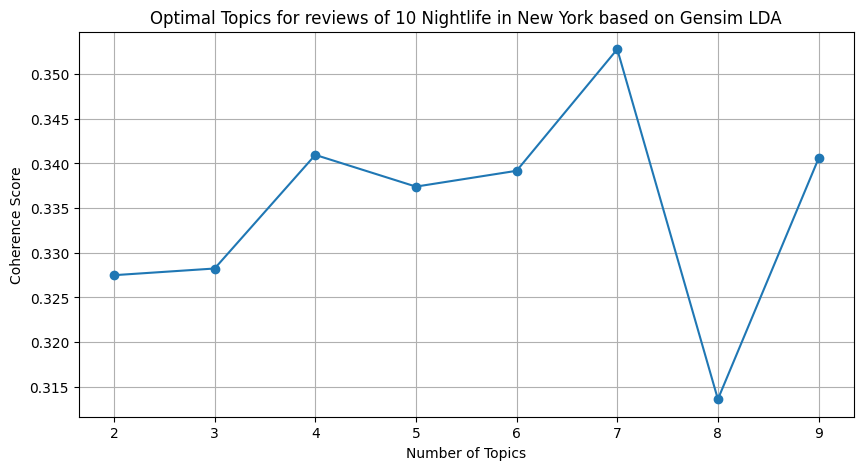

In [25]:
# determine the optimal number of topics for the corpus

import matplotlib.pyplot as plt
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
%matplotlib inline

# create an empty list to save different coherence scores 
coherence_scores = []

# Update the tokenized list to filter out unwanted words
token_list_new = Nightlife_NY["Cleaned_text"].apply(lambda x: [word for word in word_tokenize(x.lower())])

# update the dictionary and corpus
dictionary_new = Dictionary(token_list_new)

corpus_new = [dictionary_new.doc2bow(text) for text in token_list_new]

for num in range(2, 10):
    # build the LDA model using the different number of topics
    lda_model_gensim_new = LdaModel(corpus=corpus_new, num_topics=num, 
                     id2word=dictionary_new,
                     random_state=0)

    coherence_model_lda = CoherenceModel(model=lda_model_gensim_new, 
                                     texts=token_list_new, 
                                     dictionary=dictionary_new, 
                                     coherence='c_v') 
    coherence_scores.append(coherence_model_lda.get_coherence())

plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), coherence_scores, marker='o')
plt.title("Optimal Topics for reviews of 10 Nightlife in New York based on Gensim LDA")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.grid(True)

The optimal k is 7

#### sklearn LDA

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Loop through each place
for place in Nightlife_NY["Place"].unique():
    
        place_reviews = Nightlife_NY[Nightlife_NY["Place"] == place]["Cleaned_text"]

        # Set the topic modeling model using NMF
        lda_model = make_pipeline(TfidfVectorizer(), 
                                  LatentDirichletAllocation(n_components = 7, 
                                  random_state=0))

        # Train the model using unlabeled data
        lda_result = lda_model.fit_transform(place_reviews)

        # Extract components and feature names similar to NMF
        lda = lda_model.named_steps['latentdirichletallocation']
        tfidf = lda_model.named_steps['tfidfvectorizer']
        feature_names = tfidf.get_feature_names_out()

        n_top_words = 10
        topic_keywords = {}

        # Grab the top n_top_words from each topic
        for topic_idx, topic in enumerate(lda.components_):
            # Sort the topic words by their weights
            top_features_idx = topic.argsort()[-n_top_words:][::-1]
            top_features = [feature_names[i] for i in top_features_idx]
            topic_keywords[f"Topic {topic_idx}"] = top_features

        # Display the top words for each topic
        print(f"Top 7 topics (LDA) for reviews of {place}:")
        for topic, keywords in topic_keywords.items():
            print(f"{topic}: {', '.join(keywords)}")
        print("\n")

Top 7 topics (LDA) for reviews of 230 Fifth Rooftop Bar:
Topic 0: view, food, plenty, picture, amazing, outdoor, rare, fun, worth, sure
Topic 1: good, view, table, bar, rooftop, cover, night, gnat, drink, food
Topic 2: line, great, time, empire, arrive, friend, everyone, building, state, early
Topic 3: great, drink, experience, husband, expensive, crazy, ambiance, wind, variety, clear
Topic 4: seating, skyline, table, bring, midtown, decoration, manhattan, waiter, outdoor, experience
Topic 5: igloo, happy, food, good, drink, work, evening, floor, wine, look
Topic 6: table, food, good, bar, drink, music, dinner, price, visit, loud


Top 7 topics (LDA) for reviews of Please Don’t Tell:
Topic 0: hotdog, order, cocktail, menu, reservation, visit, unique, speakeasy, week, standard
Topic 1: pdt, night, dog, bar, ice, cream, people, hot, experience, drink
Topic 2: min, area, scam, place, entry, smaller, give, thru, epic, line
Topic 3: good, place, bar, bartender, crif, drink, cocktail, enter,

#### sklearn NMF

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Loop through each place
for place in Nightlife_NY["Place"].unique():
    
        place_reviews = Nightlife_NY[Nightlife_NY["Place"] == place]["Cleaned_text"]

        # Set the topic modeling model using NMF
        nmf_model = make_pipeline(TfidfVectorizer(), 
                                  NMF(n_components = 7,
                                  max_iter=500, 
                                  random_state=0))

        # Train the model using unlabeled data
        nmf_result = nmf_model.fit_transform(place_reviews)

        # Extract components and feature names similar to NMF
        nmf = nmf_model.named_steps['nmf']
        tfidf = nmf_model.named_steps['tfidfvectorizer']
        feature_names = tfidf.get_feature_names_out()

        n_top_words = 10
        topic_keywords = {}

        # Grab the top n_top_words from each topic
        for topic_idx, topic in enumerate(nmf.components_):
            # Sort the topic words by their weights
            top_features_idx = topic.argsort()[-n_top_words:][::-1]
            top_features = [feature_names[i] for i in top_features_idx]
            topic_keywords[f"Topic {topic_idx}"] = top_features

        # Display the top words for each topic
        print(f"Top 7 topics (NMF) for reviews of {place}:")
        for topic, keywords in topic_keywords.items():
            print(f"{topic}: {', '.join(keywords)}")
        print("\n")

Top 7 topics (NMF) for reviews of 230 Fifth Rooftop Bar:
Topic 0: line, nightlife, arrive, early, everyone, bottle, friend, service, great, time
Topic 1: view, bar, skyline, rooftop, night, drink, manhattan, empire, state, cover
Topic 2: good, time, bartender, ambiance, nice, night, perfect, great, dinner, waiter
Topic 3: table, gnat, minute, someone, drink, bar, order, reservation, multiple, bring
Topic 4: food, menu, steak, reservation, decent, rare, medium, enjoy, large, drink
Topic 5: great, amazing, experience, week, blanket, ambiance, husband, time, use, staff
Topic 6: igloo, warm, happy, nice, much, able, cold, 14, work, top


Top 7 topics (NMF) for reviews of Please Don’t Tell:
Topic 0: pdt, night, ice, cream, dog, bar, hr, gay, girl, glad
Topic 1: cocktail, pdt, city, drink, bar, good, perfect, classic, bit, speakeasy
Topic 2: place, decor, cocktail, old, time, service, bartender, warm, check, good
Topic 3: ambiance, hour, cute, super, line, long, phone, booth, text, shop
Topi

#### Gensim NMF

In [28]:
from gensim.corpora import Dictionary
from gensim.models import Nmf
from gensim.matutils import Sparse2Corpus
from nltk.tokenize import word_tokenize

# Loop through each place
for place in Nightlife_NY["Place"].unique():
    place_reviews = Nightlife_NY[Nightlife_NY["Place"] == place]["Cleaned_text"]

    # clean the reviews
    token_list = [word_tokenize(review) for review in place_reviews]
    
    # Create a dictionary representation of the documents
    dictionary = Dictionary(token_list)
    
    # Convert document into the bag-of-words (BoW) format
    corpus = [dictionary.doc2bow(text) for text in token_list]
    
    # Build the NMF model
    nmf_gensim = Nmf(corpus=corpus, num_topics=7, 
                    id2word=dictionary, # convert the word id into word itself
                    random_state=0)
    
    # Print the top 10 words for each topic
    print(f"Top 7 topics (Gensim NMF) for reviews of {place}: \n")
    
    topics = nmf_gensim.print_topics(num_words=10)
    
    for index, topic in enumerate(topics):
        print(f"Topic {index}: {topic} \n")

Top 7 topics (Gensim NMF) for reviews of 230 Fifth Rooftop Bar: 

Topic 0: (0, '0.028*"place" + 0.027*"view" + 0.024*"building" + 0.024*"empire" + 0.022*"state" + 0.021*"line" + 0.020*"rooftop" + 0.017*"area" + 0.017*"venue" + 0.017*"great"') 

Topic 1: (1, '0.045*"drink" + 0.044*"table" + 0.035*"food" + 0.033*"u" + 0.032*"bar" + 0.021*"someone" + 0.020*"good" + 0.019*"minute" + 0.019*"time" + 0.016*"nice"') 

Topic 2: (2, '0.037*"food" + 0.014*"good" + 0.014*"place" + 0.013*"thing" + 0.012*"restaurant" + 0.010*"drink" + 0.010*"cover" + 0.009*"cool" + 0.009*"sign" + 0.009*"bar"') 

Topic 3: (3, '0.040*"view" + 0.034*"experience" + 0.032*"rooftop" + 0.023*"fifth" + 0.021*"city" + 0.017*"venue" + 0.017*"drink" + 0.016*"menu" + 0.015*"staff" + 0.013*"bar"') 

Topic 4: (4, '0.030*"good" + 0.021*"dinner" + 0.020*"igloo" + 0.018*"restaurant" + 0.016*"wine" + 0.015*"salad" + 0.015*"hot" + 0.013*"tasty" + 0.012*"person" + 0.012*"plate"') 

Topic 5: (5, '0.031*"u" + 0.028*"friend" + 0.025*"serv

#### Draw an intertopic distance map based on the BERTopic model

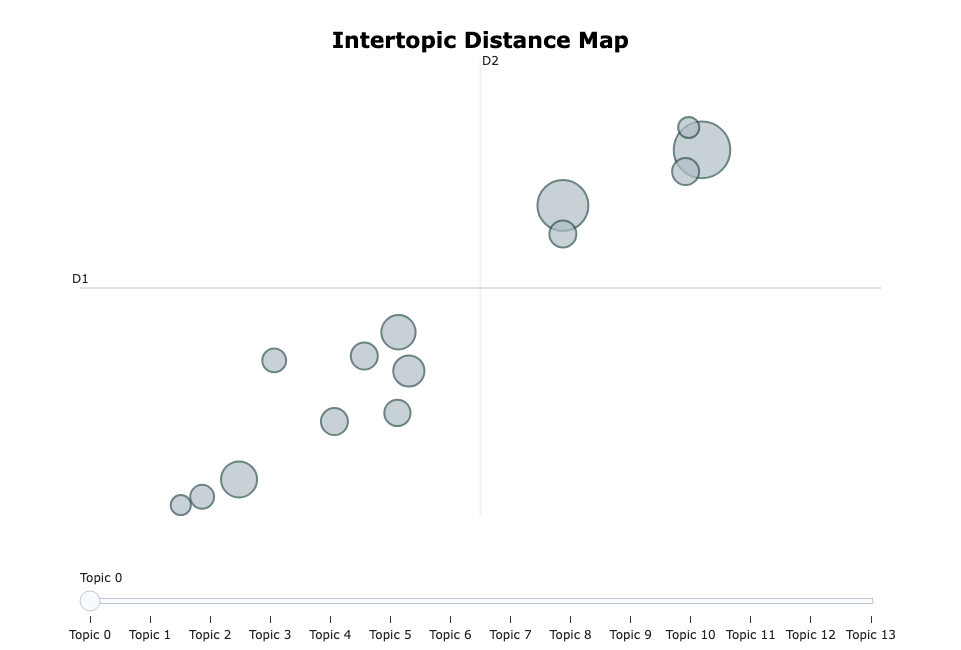

In [29]:
from bertopic import BERTopic

# Build the model with BERTopic
BER_model = BERTopic() 
topics, probabilities = BER_model.fit_transform(Nightlife_NY["Cleaned_text"])

# visualize the model: intertopic distance map
BER_model.visualize_topics()                            

### Visualization Graph

#### WordCloud with TF-IDF bigrams

In [30]:
# unique place
unique_place_names = Nightlife_NY['Place'].unique()
unique_place_names

array(['230 Fifth Rooftop Bar', 'Please Don’t Tell', 'The Dead Rabbit',
       'Raines Law Room', 'Apotheke', 'Refinery Rooftop', 'Slate NY',
       'Mr. Purple', 'Attaboy', 'Dear Irving'], dtype=object)

In [31]:
# create new dataframe for each unique place
Fifth_Rooftop_Bar = Nightlife_NY[Nightlife_NY['Place'] == '230 Fifth Rooftop Bar']
Fifth_Rooftop_Bar.head()

Place                                          Place_url  \
0  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
1  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
2  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
3  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   
4  230 Fifth Rooftop Bar  https://www.yelp.com/biz/230-fifth-rooftop-bar...   

                                          Review_url   Customer  Ratings  \
0  https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jackie S.        4   
1  https://www.yelp.com/biz/230-fifth-rooftop-bar...    Seth S.        4   
2  https://www.yelp.com/biz/230-fifth-rooftop-bar...  Jordan U.        3   
3  https://www.yelp.com/biz/230-fifth-rooftop-bar...   Filip W.        2   
4  https://www.yelp.com/biz/230-fifth-rooftop-bar...  Brenda D.        5   

           Date                                        Review_text  \
0  Jul 27, 2014  The first time I came here was in the fall, so...   
1  Jan 26, 2024  After seeing many TikToks about 230 Fifth befo...   
2  Apr 16, 2024  Come for the views, leave for the drinks.On a ...   
3  Feb 17, 2024  I bought the prefix menu. Ans it was the most ...   
4  Apr 14, 2024  We noticed a cool spot with lights from The Em...   

          Location  Helpful  \
0    Oceanside, NY        5   
1  Chula Vista, CA        1   
2      Fairfax, VA        0   
3    San Diego, CA        2   
4  Albuquerque, NM        0   

                                        Cleaned_text  \
0  first time fall rooftop privilege outside priv...   
1  many tiktoks fifth trip nyc itinerary view lat...   
2  come view beautiful spring day spot perfection...   
3  prefix menu disappointing restaurant experienc...   
4  noticed cool spot light empire state building ...   

                                     Limited_cleaned Sentiment  Polarity  \
0  [first, time, came, fall, abuse, rooftop, priv...   Neutral  0.165789   
1  [seeing, many, TikToks, 230, Fifth, trip, NYC,...  Positive  0.247917   
2  [Come, view, leave, drink, beautiful, spring, ...  Positive  0.537500   
3  [bought, prefix, menu, Ans, disappointing, res...  Positive  0.040774   
4  [noticed, cool, spot, light, Empire, State, Bu...  Positive  0.419643   

   Subjectivity  
0      0.489912  
1      0.597917  
2      0.375000  
3      0.415774  
4      0.676786

In [32]:
# create new dataframe for each unique place
Please_Dont_Tell = Nightlife_NY[Nightlife_NY['Place'] == 'Please Don’t Tell']
The_Dead_Rabbit = Nightlife_NY[Nightlife_NY['Place'] == 'The Dead Rabbit']
Raines_Law_Room = Nightlife_NY[Nightlife_NY['Place'] == 'Raines Law Room']
Apotheke = Nightlife_NY[Nightlife_NY['Place'] == 'Apotheke']
Refinery_Rooftop = Nightlife_NY[Nightlife_NY['Place'] == 'Refinery Rooftop']
Slate_NY = Nightlife_NY[Nightlife_NY['Place'] == 'Slate NY']
Mr_Purple = Nightlife_NY[Nightlife_NY['Place'] == 'Mr. Purple']
Attaboy = Nightlife_NY[Nightlife_NY['Place'] == 'Attaboy']
Dear_Irving = Nightlife_NY[Nightlife_NY['Place'] == 'Dear Irving']

In [33]:
# merge all the Review_text to one string
# Join all the values in the column into a single string separated by spaces
Cleaned_new_1 = ' '.join(Fifth_Rooftop_Bar["Cleaned_text"])
Cleaned_new_2 = ' '.join(Please_Dont_Tell["Cleaned_text"])
Cleaned_new_3 = ' '.join(The_Dead_Rabbit["Cleaned_text"])
Cleaned_new_4 = ' '.join(Raines_Law_Room["Cleaned_text"])
Cleaned_new_5 = ' '.join(Apotheke["Cleaned_text"])
Cleaned_new_6 = ' '.join(Refinery_Rooftop["Cleaned_text"])
Cleaned_new_7 = ' '.join(Slate_NY["Cleaned_text"])
Cleaned_new_8 = ' '.join(Mr_Purple["Cleaned_text"])
Cleaned_new_9 = ' '.join(Attaboy["Cleaned_text"])
Cleaned_new_10 = ' '.join(Dear_Irving["Cleaned_text"])

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# using wordcloud to remove stopwords
from wordcloud import WordCloud, STOPWORDS

# Dictionary containing cleaned text for each product
cleaned_texts = {
    '230 Fifth Rooftop Bar': Cleaned_new_1,
    'Please Don’t Tell': Cleaned_new_2,
    'The Dead Rabbit': Cleaned_new_3,
    'Raines Law Room': Cleaned_new_4,
    'Apotheke': Cleaned_new_5,
    'Refinery Rooftop': Cleaned_new_6,
    'Slate NY': Cleaned_new_7,
    'Mr. Purple': Cleaned_new_8,
    'Attaboy': Cleaned_new_9,
    'Dear Irving': Cleaned_new_10
}

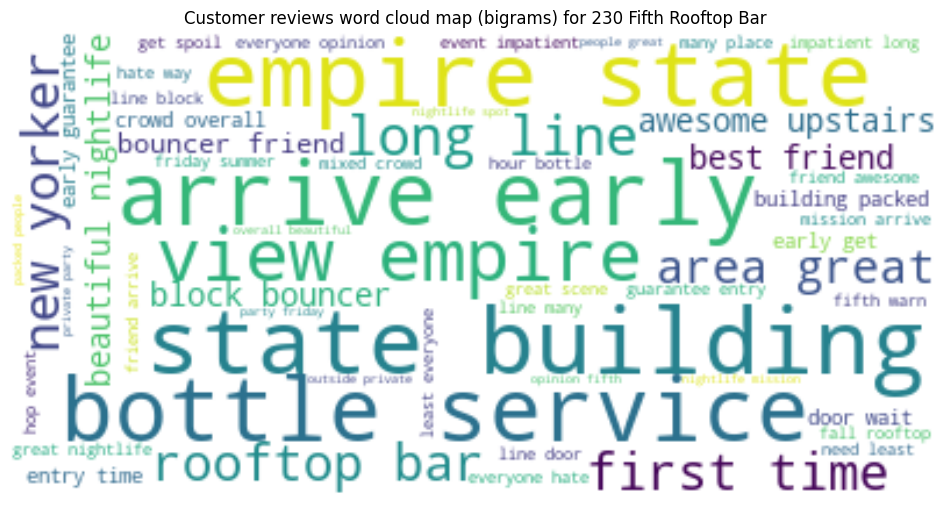

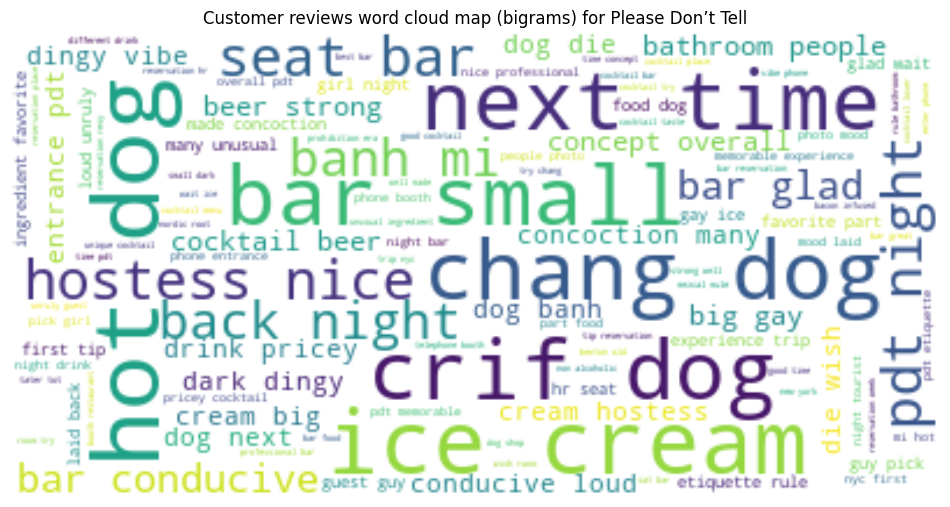

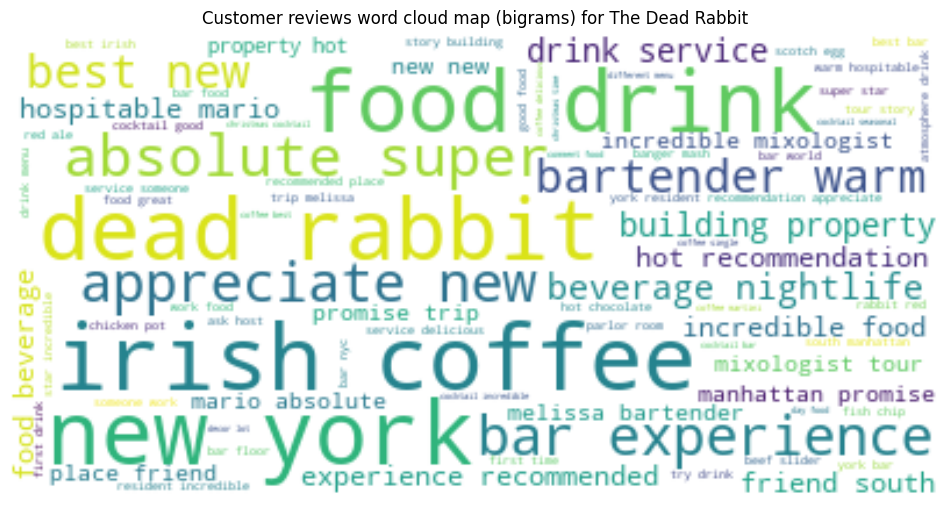

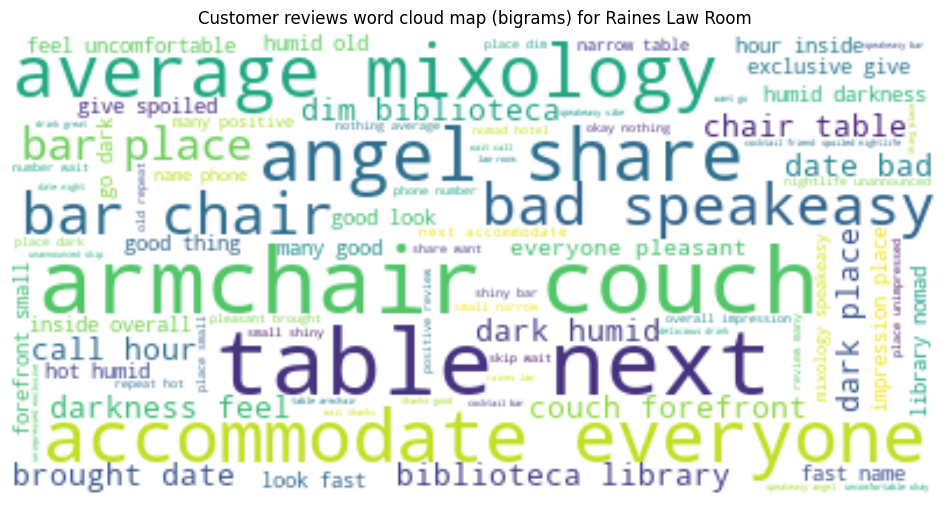

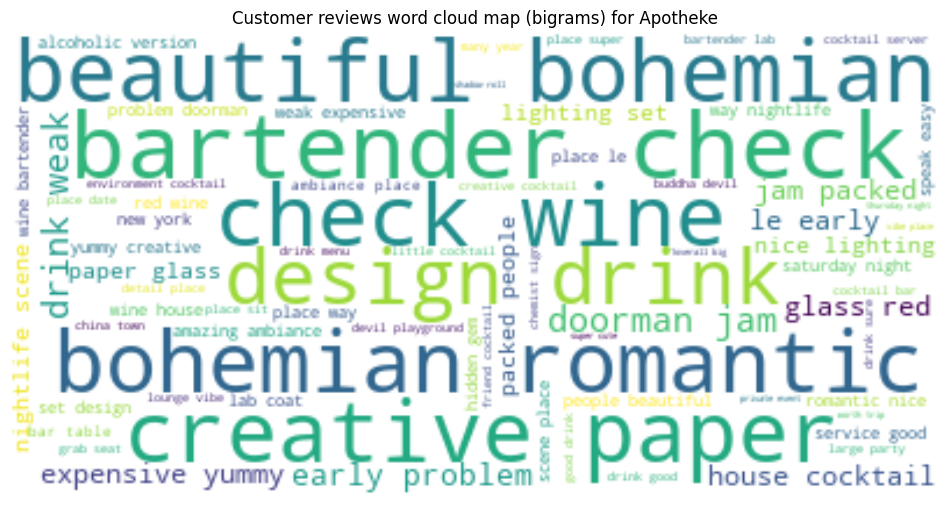

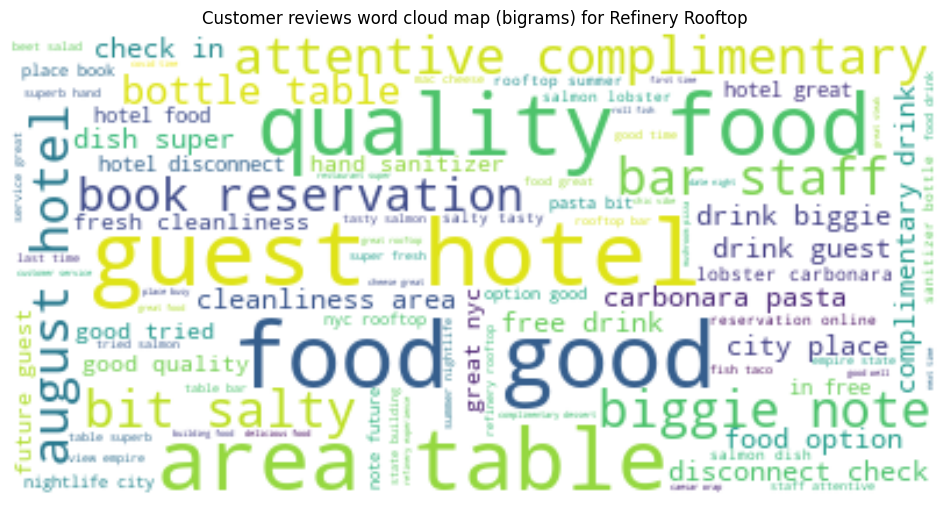

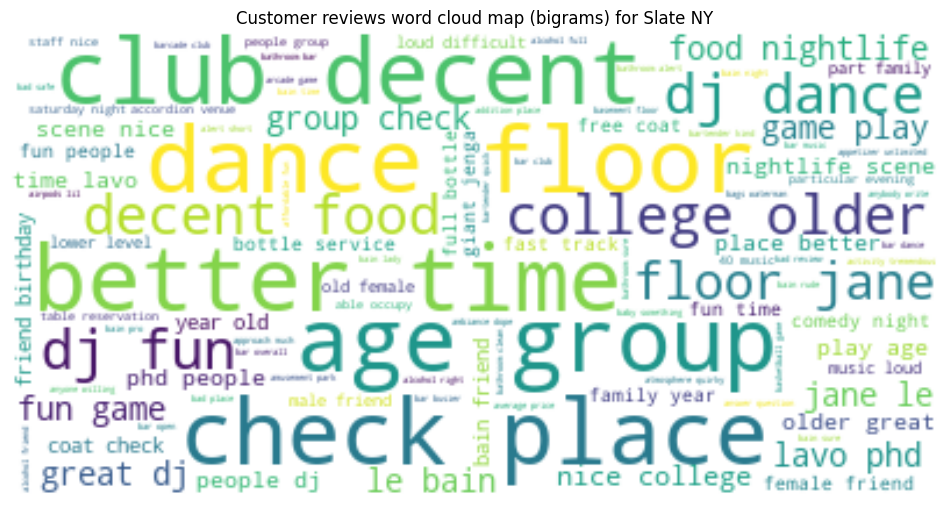

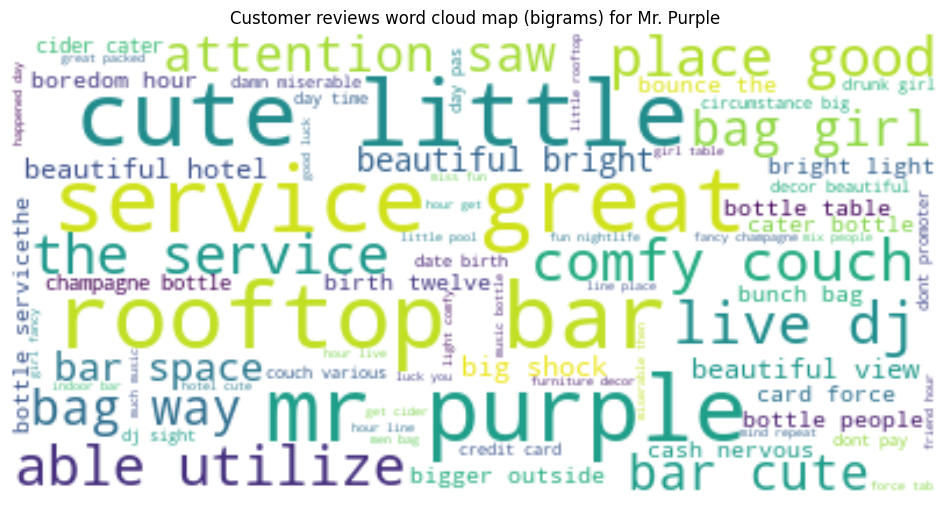

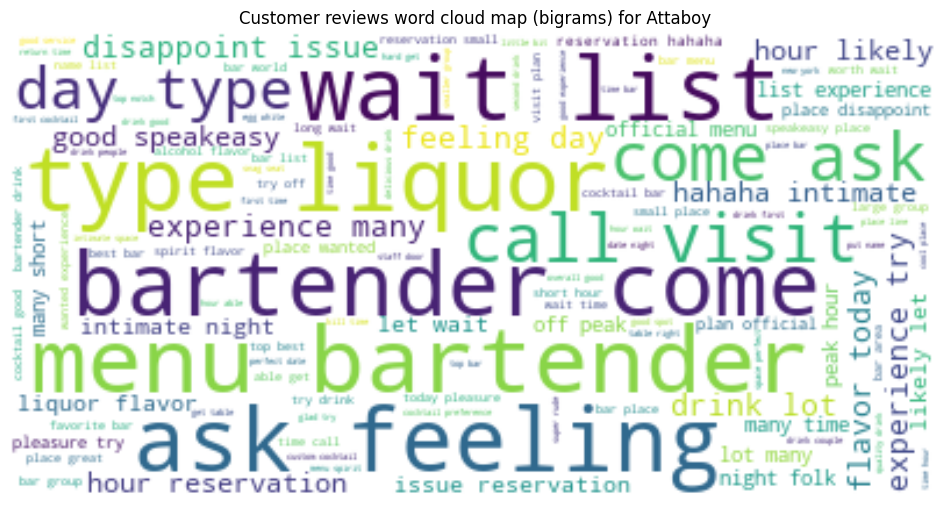

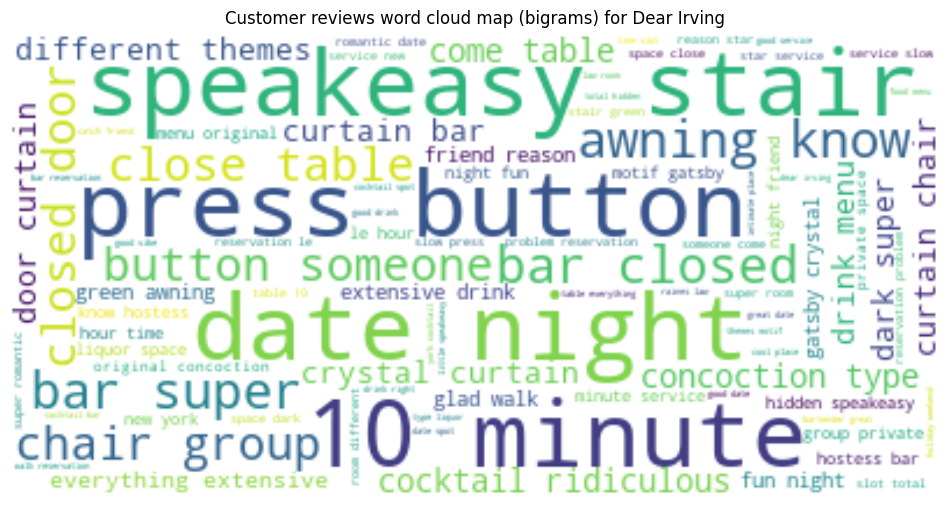

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

for place_name, cleaned_text in cleaned_texts.items():
    # Convert Cleaned_new is a list of strings
    cleaned_text = [cleaned_text]  # Encapsulate the string in a list
    
    # Initialize TfidfVectorizer to consider only bigrams
    tfidfVectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2)) # to get regular bigram set use_idf=False
    
    # Fit and transform the documents
    tfidf_matrix_bigram = tfidfVectorizer_bigram.fit_transform(cleaned_text)
    
    # Sum the TF-IDF scores for each bigram across all documents
    bigram_sum = tfidf_matrix_bigram.sum(axis=0)

    # Get the feature names, which are the bigrams
    bigram_names = tfidfVectorizer_bigram.get_feature_names_out()
    
    # Map bigram names to their summed TF-IDF scores
    bigram_scores = {bigram: bigram_sum[0, idx] for idx, bigram in enumerate(bigram_names)}

    # Generate the word cloud using the bigram scores
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.1, background_color='white')
    # notice here is .generate_from_frequencies() from the TFIDF scores (numbers)
    wordcloud.generate_from_frequencies(bigram_scores)

    # Plot word cloud
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Customer reviews word cloud map (bigrams) for {place_name}')
    plt.axis("off")
    plt.show()

#### Word Cloud Poster for Dear Irving

(-0.5, 511.5, 511.5, -0.5)

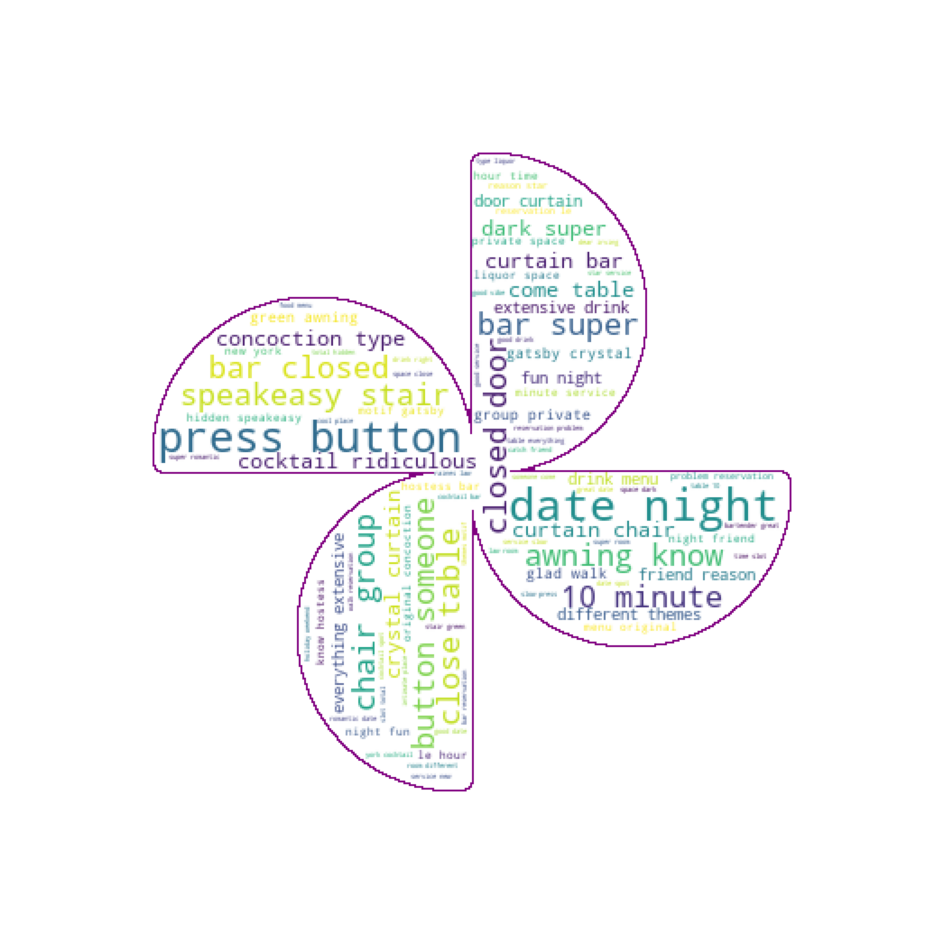

In [36]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# step 1: get the URL of the image
image_url = "https://play-lh.googleusercontent.com/ZyWNGIfzUyoajtFcD7NhMksHEZh37f-MkHVGr5Yfefa-IX7yj9SMfI82Z7a2wpdKCA" # this is an Google photo logo image

# step 2: fetch the image from the website
response = requests.get(image_url)

# step 3: load the image with Pillow library (PIL)
# this provides a file-like interface for reading and writing bytes objects not a simply string
img = Image.open(BytesIO(response.content))

# step 4: convert the image to grayscale because the mask operates based on lightness values. 
# The word cloud generation process uses the mask to determine where to place words: 
# typically, words are placed in the darker areas (or the non-white areas if you invert the mask).
img = img.convert('L')

# step 5: convert the image to a numpy array
# if you are using a local image you can directly set mask = np.array(Image.open(file path))
mask = np.array(img)

# step 6: generate word cloud map with mask
wordcloud = WordCloud(relative_scaling=.1, 
                      background_color="white", 
                      mask=mask, # set up the mask parameter
                      contour_width=1, contour_color='purple' # set up the image border lines and color
                     )
wordcloud.generate_from_frequencies(bigram_scores)

# step 7: display the word cloud
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")

## IV. Conclusion

1. Top three important words from TF-IDF Unigram are line, early, arrive. Suggest people to arrive early to avoid waiting in line.
2. The most common words from TF-IDF Bigram is arrive early.
3. 267 reviwers live in New York.
4. The most rated place is 230 Fifth Rooftop Bar follows by Please Don’t Tell.
5. Average rating of all places is: 4.10.
6. Average helpful reviews of all places is: 2.5.
7. Rating distributions: 5:239, 4:157. 3:77, 1:28, 2:12 which means most people find the review very helpful.
8. Customers who privide the most reviews: Michelle C. 21, Jackie S. 11, Emma T. 10, m k. 10, Lucy C. 10
9. The most mentioned location is New York, NY follow by Brookyln, Manhattan and Queens.

10. Lexicon-based sentiment analysis offers some appealing advantages such as simplicity, ease of implementation, language and domain adaptability, interpretability, and no need for annotated training data. It is very fast, especially for this nightlife data, since it generally relies on straightforward word lookups and summations against a pre-existing sentiment lexicon. However, it often fails to capture context and nuances like sarcasm, negation, and idiomatic expressions. The accuracy heavily depends on the quality and comprehensiveness of the underlying sentiment lexicon. Lexicon methods tend to lack granularity in understanding sentiment intensity levels compared to machine learning techniques. Moreover, they do not improve over time with more data like ML models do, and can struggle with lexical ambiguity where words carry different sentiments across contexts.

Therefore, I beleive by using ChatGPT api, it could do extremly better job than Lexicon-based sentiment analysis.

11. Topics for reviews of "230 Fifth Rooftop Bar"
- Topic 0: This topic seems to revolve around the view and ambiance of the rooftop bar, with keywords like "view," "outdoor," "amazing," and "worth."
- Topic 1: Keywords like "good," "bar," "rooftop," and "drink" suggest discussions related to the overall experience at the bar, including the quality of drinks and the atmosphere.
- Topic 2: This topic might be related to the logistics of visiting the bar, with keywords such as "line," "arrive," and "building," possibly indicating discussions about waiting times and the location.
- Topic 3: The keywords here, such as "experience," "ambiance," and "variety," suggest discussions about the overall experience and the variety of offerings available.
- Topic 4: This topic appears to focus on seating arrangements and the skyline view, with keywords like "seating," "skyline," and "outdoor."
- Topic 5: Keywords like "happy," "food," and "drink" could indicate discussions about food and drink options during happy hours or special occasions.
- Topic 6: This topic might relate to overall satisfaction with the bar, with keywords like "good," "service," and "visit."

Overall it matches its wordcloud.

Please Don’t Tell:

- Topic 0: This topic seems to focus on specific menu items and the experience of ordering, with keywords like "hotdog," "order," "cocktail," and "reservation."
- Topic 1: Keywords like "night," "bar," "experience," and "drink" suggest discussions about the overall experience at the speakeasy, including the ambiance and specialty drinks.
- Topic 2: This topic might relate to logistical aspects of visiting the speakeasy, with keywords like "entry," "line," and "place."
- Topic 3: Discussions seem to center around the quality of drinks and the unique experience of visiting a speakeasy, with keywords like "good," "cocktail," and "speakeasy."
- Topic 4: Keywords like "music," "food," and "unique" indicate discussions about the ambiance and unique features of the establishment.
- Topic 5: This topic might relate to special events or occasions, with keywords like "opening," "dinner," and "future."
- Topic 6: Discussions here seem to focus on the overall experience and atmosphere, with keywords like "cool," "service," and "tasteless."

Overall it matches its wordcloud.

The Dead Rabbit:

- Topic 0: Discussions appear to focus on the Irish coffee and overall experience at the bar, with keywords like "coffee," "irish," and "delicious."
- Topic 1: Keywords like "coffee," "irish," and "popular" suggest discussions about the popularity and quality of the Irish coffee.
- Topic 2: This topic might relate to specific areas or features of the bar, with keywords like "upstairs," "banger," and "exclusive."
- Topic 3: Discussions seem to revolve around the ambiance and unique features of the bar, with keywords like "fun," "vibe," and "christmas."
- Topic 4: Keywords like "seating," "menu," and "sandwich" indicate discussions about the seating arrangements and food offerings.
- Topic 5: Discussions here seem to focus on recommendations and experiences, with keywords like "incredible," "recommended," and "south."
- Topic 6: This topic might relate to the overall experience and service, with keywords like "festive," "service," and "tasteless."

Overall it matches its wordcloud.

Raines Law Room:

- Topic 0: Discussions here seem to focus on the ambiance and experience of visiting the speakeasy, with keywords like "place," "small," and "speakeasy."
- Topic 1: Keywords like "cocktail," "drink," and "price" suggest discussions about the quality and pricing of drinks.
- Topic 2: This topic might relate to the overall experience and atmosphere, with keywords like "night," "vibe," and "cool."
- Topic 3: Discussions seem to revolve around the unique features and suitability of the bar, with keywords like "cool," "spectacular," and "upscale."
- Topic 4: Keywords like "friend," "date," and "location" indicate discussions about socializing and the venue's suitability for different occasions.
- Topic 5: Discussions here seem to focus on the experience of visiting the bar, with keywords like "time," "reservation," and "staff."
- Topic 6: This topic might relate to specific experiences or aspects of the bar, with keywords like "cool," "experience," and "service."

Overall it matches its wordcloud.

Apotheke:

- Topic 0: Discussions seem to revolve around the ambiance and theme of the speakeasy, with keywords like "chemist," "speakeasy," and "ambiance."
- Topic 1: Keywords like "bar," "location," and "drink" suggest discussions about the overall experience and offerings of the bar.
- Topic 2: This topic might relate to the quality and uniqueness of offerings, with keywords like "good," "quality," and "dope."
- Topic 3: Discussions seem to focus on the ambiance and unique features of the bar, with keywords like "music," "gem," and "hidden."
- Topic 4: Keywords like "wine," "place," and "lighting" indicate discussions about the overall atmosphere and features of the bar.
- Topic 5: Discussions here seem to focus on personal experiences and recommendations, with keywords like "friend," "night," and "super."
- Topic 6: This topic might relate to the overall experience and service quality, with keywords like "good," "reservation," and "service."

Overall it matches its wordcloud.

Refinery Rooftop:

- Topic 0: Discussions here seem to focus on the location and ambiance of the rooftop, with keywords like "spot," "new," and "building."
- Topic 1: Keywords like "brunch," "service," and "experience" suggest discussions about the overall dining experience and customer service.
- Topic 2: This topic might relate to the atmosphere and vibe of the rooftop, with keywords like "night," "vibe," and "restaurant."
- Topic 3: Discussions seem to revolve around specific experiences and dishes, with keywords like "experience," "food," and "delicious."
- Topic 4: Keywords like "rooftop," "view," and "meal" indicate discussions about the rooftop setting and dining options.
- Topic 5: Discussions here seem to focus on specific experiences and occasions, with keywords like "time," "summer," and "group."
- Topic 6: This topic might relate to the hotel setting and overall experience, with keywords like "hotel," "guest," and "service."

Overall it matches its wordcloud.

Slate NY:

- Topic 0: Discussions here seem to focus on the venue's staff and entry process, with keywords like "staff," "coat," and "level."
- Topic 1: Keywords like "night," "drink," and "friend" suggest discussions about the overall nightlife experience and socializing.
- Topic 2: This topic might relate to the venue's atmosphere and safety, with keywords like "vibe," "space," and "safe."
- Topic 3: Discussions seem to revolve around reservations and group experiences, with keywords like "friend," "reservation," and "group."
- Topic 4: Keywords like "dj," "nightlife," and "scene" indicate discussions about the entertainment and ambiance of the venue.
- Topic 5: Discussions here seem to focus on customer service and security, with keywords like "rude," "security," and "service."
- Topic 6: This topic might relate to overall experiences and interactions, with keywords like "year," "experience," and "question."

Overall it matches its wordcloud.

Mr. Purple:

- Topic 0: Discussions here seem to focus on specific drinks and occasions, with keywords like "lychee," "birthday," and "martini."
- Topic 1: Keywords like "rooftop," "view," and "drink" suggest discussions about the rooftop experience and beverage offerings.
- Topic 2: This topic might relate to wait times and popularity, with keywords like "difficult," "wait," and "premium."
- Topic 3: Discussions seem to revolve around the overall experience and ambiance, with keywords like "great," "amazing," and "service."
- Topic 4: Keywords like "view," "moment," and "pricey" indicate discussions about the rooftop setting and pricing.
- Topic 5: Discussions here seem to focus on overall experiences and enjoyment, with keywords like "fun," "delicious," and "place."
- Topic 6: This topic might relate to specific experiences and interactions, with keywords like "place," "bottle," and "hour."

Overall it matches its wordcloud.

Attaboy:

- Topic 0: Discussions here seem to focus on positive experiences and recommendations, with keywords like "best," "delicious," and "quality."
- Topic 1: Keywords like "place," "hour," and "try" suggest discussions about visiting the bar and trying different offerings.
- Topic 2: This topic might relate to specific requests or experiences, with keywords like "cocktail," "coconut," and "request."
- Topic 3: Discussions seem to revolve around the quality of drinks and bartending, with keywords like "cocktail," "bartender," and "exceptional."
- Topic 4: Keywords like "price," "tab," and "service" indicate discussions about pricing and service quality.
- Topic 5: Discussions here seem to focus on group experiences and preparation, with keywords like "group," "detail," and "prepare."
- Topic 6: This topic might relate to personal experiences and interactions, with keywords like "friend," "fantastic," and "tell."

Overall it matches its wordcloud.

Dear Irving:

- Topic 0: Discussions here seem to focus on positive experiences and recommendations, with keywords like "best," "great," and "service."
- Topic 1: Keywords like "good," "staff," and "bar" suggest discussions about the overall experience and atmosphere.
- Topic 2: This topic might relate to specific experiences and occasions, with keywords like "little," "place," and "vibe."
- Topic 3: Discussions seem to revolve around specific menu items and options, with keywords like "cocktail," "whiskey," and "option."
- Topic 4: Keywords like "curtain," "reservation," and "space" indicate discussions about the reservation process and ambiance.
- Topic 5: Discussions here seem to focus on overall experiences and interactions, with keywords like "service," "night," and "door."
- Topic 6: This topic might relate to negative experiences and interactions, with keywords like "worse," "rude," and "horrible."

Overall it matches its wordcloud.

12. Based on Intertopic Distance Map we can see that
- Topic 0, 5 and 12 are similar to each other
- Topic 1 and 7 are similar to each other
- Topic 2, 11 and 13 are similar to each other
- Topic 3, 6, 4, 8, 9 and 10 are similar to each other